In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

plt.style.use('seaborn-bright')

In [2]:
#limits
## 24-hour means unless otherwise specified. Using 8-hour as a proxy when unavailable
pollutant_who = {}
pollutant_who['co']   = 0
pollutant_who['no2']  = 0
pollutant_who['o3']   = 100 ##  8-hour mean
pollutant_who['pm10'] = 50
pollutant_who['pm25'] = 25
pollutant_who['so2']  = 20  

## annual in 'industrial, residential, rural, others' areas
pollutant_naaqs = {}
pollutant_naaqs['co']   = 2   ##  8-hour mean
pollutant_naaqs['no2']  = 80
pollutant_naaqs['o3']   = 100 ##  8-hour mean
pollutant_naaqs['pm10'] = 100
pollutant_naaqs['pm25'] = 60
pollutant_naaqs['so2']  = 80  

In [3]:
#read in the data

year = 2020
df_rural = pd.read_csv(f'../code/data/{year}_7rural.csv')
df_urban = pd.read_csv(f'../code/data/{year}_7cities.csv')
print(df_urban.head())
print("rural:", df_rural.shape)
print("urban:", df_urban.shape)
df_urban.drop(['count', 'min', 'max', 'variance', 'Country'], axis=1, inplace=True)
print("urban:", df_urban.shape)

         Date Country       City Specie  count  min    max  median  variance
0  28/02/2020      IN  Hyderabad    no2     96  3.0   32.7    12.2    405.29
1  09/03/2020      IN  Hyderabad    no2    120  0.3   27.1     8.2    403.07
2  06/04/2020      IN  Hyderabad    no2     95  0.1   31.2     6.1    848.08
3  11/04/2020      IN  Hyderabad    no2    113  0.2  500.0     7.4  43973.00
4  08/05/2020      IN  Hyderabad    no2    120  0.8   23.1     7.8    492.57
rural: (1040, 8)
urban: (7601, 9)
urban: (7601, 4)


In [4]:
df_rural = pd.melt(df_rural, id_vars=['city', 'date'], value_vars=['pm25', 'pm10','o3', 'no2', 'so2', 'co'] )
print("rural:", df_rural.shape)

rural: (6240, 4)


In [5]:
# clean up: make column names consistent across the two tables

df_rural.rename(columns = {'date':'Date', 'city':'City', 'variable':'Specie'}, inplace=True)
df_urban.rename(columns = {'median':'value'}, inplace=True)
# clean up: fix date column and filter so that just this year's data is included
df_rural.Date = pd.to_datetime(df_rural.Date, format = '%d/%m/%Y') # need the format string to specify which is the month and which is the year
df_rural['month_num'] = pd.DatetimeIndex(df_rural['Date']).month
df_rural['month_name'] = df_rural.Date.dt.month_name()
df_rural.dtypes

print(df_rural.shape)
# just keep this year's data, discard everything else
df_rural = df_rural[df_rural['Date'].dt.year == year]
print(df_rural.shape)

#Same for urban 
df_urban.Date = pd.to_datetime(df_urban.Date, format = '%d/%m/%Y') # need the format string to specify which is the month and which is the year
df_urban['month_num'] = pd.DatetimeIndex(df_urban['Date']).month
df_urban['month_name'] = df_urban.Date.dt.month_name()
df_urban.dtypes
print(df_urban.shape)
# just keep this year's data, discard everything else
df_urban = df_urban[df_urban['Date'].dt.year == year]
print(df_urban.shape)

(6240, 6)
(6240, 6)
(7601, 6)
(7518, 6)


In [6]:

print(df_urban.head())
print(df_rural.head())

        Date       City Specie  value  month_num month_name
0 2020-02-28  Hyderabad    no2   12.2          2   February
1 2020-03-09  Hyderabad    no2    8.2          3      March
2 2020-04-06  Hyderabad    no2    6.1          4      April
3 2020-04-11  Hyderabad    no2    7.4          4      April
4 2020-05-08  Hyderabad    no2    7.8          5        May
         City       Date Specie  value  month_num month_name
0  coimbatore 2020-01-03   pm25     98          1    January
1  coimbatore 2020-01-04   pm25    102          1    January
2  coimbatore 2020-01-05   pm25     66          1    January
3  coimbatore 2020-01-06   pm25     62          1    January
4  coimbatore 2020-01-07   pm25     53          1    January


In [20]:
combo = pd.concat([df_urban, df_rural], sort=False)
print(combo.head())
print(combo.shape)
locations = combo.City.unique()
pollutants = combo.Specie.unique().tolist()
pollutants.sort()
print(locations)
print(pollutants)
# add colors for locations and pollutants & boxplot!
combo['pNum'] = combo.Specie.apply(lambda x: pollutants.index(x))
combo['cNum'] = combo.City.apply(locations.tolist().index)

        Date       City Specie  value  month_num month_name
0 2020-02-28  Hyderabad    no2   12.2          2   February
1 2020-03-09  Hyderabad    no2    8.2          3      March
2 2020-04-06  Hyderabad    no2    6.1          4      April
3 2020-04-11  Hyderabad    no2    7.4          4      April
4 2020-05-08  Hyderabad    no2    7.8          5        May
(13758, 6)
['Hyderabad' 'Delhi' 'Chennai' 'Visakhapatnam' 'Mumbai' 'Bengaluru'
 'Kolkata' 'coimbatore' 'guwahati' 'jabalpur' 'kota' 'mussoorie' 'vapi']
['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']


In [18]:
print(type(pollutants.tolist()))
p = pollutants.tolist()
p.sort()

print(p)


<class 'list'>
['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']


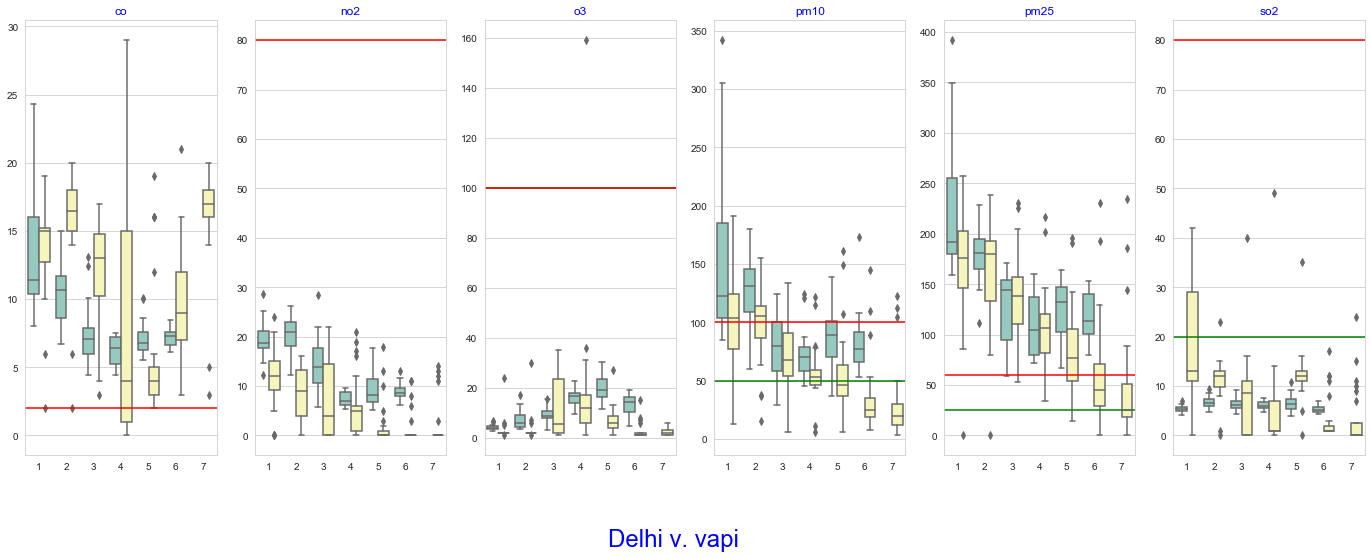

In [23]:
# let's just try Delhi and Vapi
fig, ax = plt.subplots(1, len(pollutants), figsize=(24, 8))
city_r = 'vapi'
city_u = 'Delhi'
df = combo[(combo.City == city_u) | (combo.City == city_r)]
for i, p in enumerate(pollutants):
    d = df[df.Specie == p]     
    a = ax[i]
    sns.set_style("whitegrid")
    bp = sns.boxplot(x=d.month_num, y=d.value, hue=d.City, palette='Set3', ax=a)
    a.set(xlabel='', ylabel='')
    bp.legend_.remove()
    #d[d.City == city].boxplot(column='value', by='month_num', ax=a)
    a.set_title(p, color='blue')
    if pollutant_who[p]:
        a.axhline(y=pollutant_who[p], c='g')
    if pollutant_naaqs[p]:
        a.axhline(y=pollutant_naaqs[p], c='r')
plt.suptitle(f'{city_u} v. {city_r}', fontsize=24, color='b', y=-0.001)
plt.savefig(f'images/boxplot-{city_u}-{city_r}-poll.png', bbox_inches='tight')
plt.show()

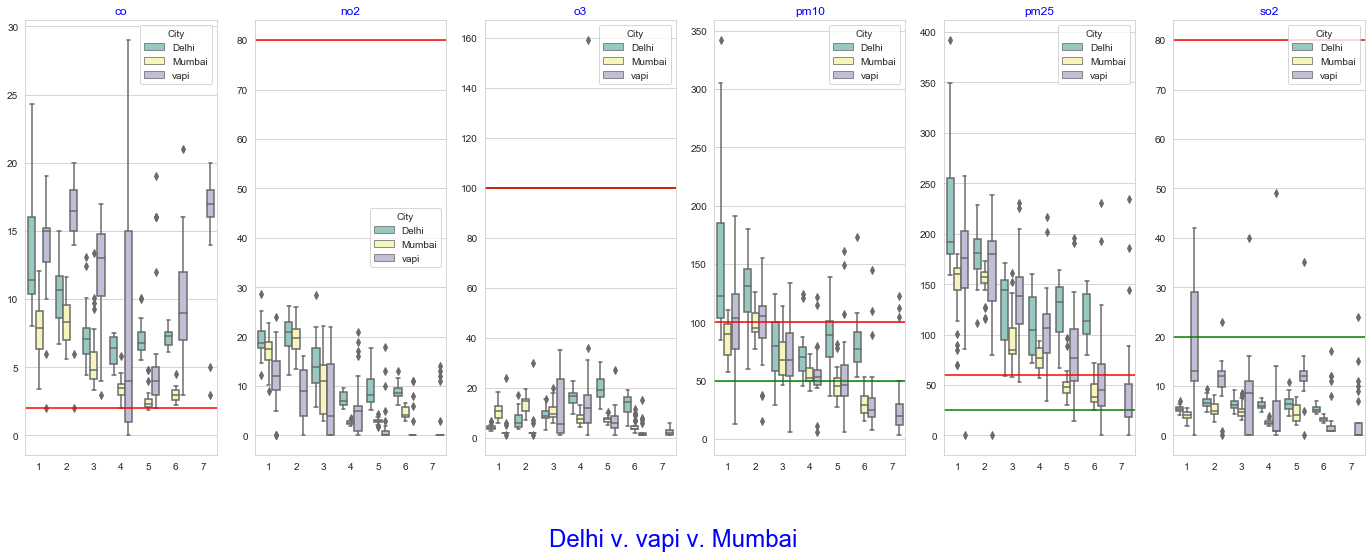

In [25]:
# and a few more: add Mumbai to the mix:
fig, ax = plt.subplots(1, len(pollutants), figsize=(24, 8))
city_r = 'vapi'
city_u = 'Delhi'
city_u2 = 'Mumbai'
df = combo[(combo.City == city_u) | (combo.City == city_r) | (combo.City == city_u2)]
for i, p in enumerate(pollutants):
    d = df[df.Specie == p]     
    a = ax[i]
    sns.set_style("whitegrid")
    bp = sns.boxplot(x=d.month_num, y=d.value, hue=d.City, palette='Set3', ax=a)
    a.set(xlabel='', ylabel='')
    #bp.legend_.remove()
    #d[d.City == city].boxplot(column='value', by='month_num', ax=a)
    a.set_title(p, color='blue')
    if pollutant_who[p]:
        a.axhline(y=pollutant_who[p], c='g')
    if pollutant_naaqs[p]:
        a.axhline(y=pollutant_naaqs[p], c='r')
plt.suptitle(f'{city_u} v. {city_r} v. {city_u2}', fontsize=24, color='b', y=-0.001)
#plt.savefig(f'images/boxplot-{city_u}-{city_r}-poll.png', bbox_inches='tight')
plt.show()

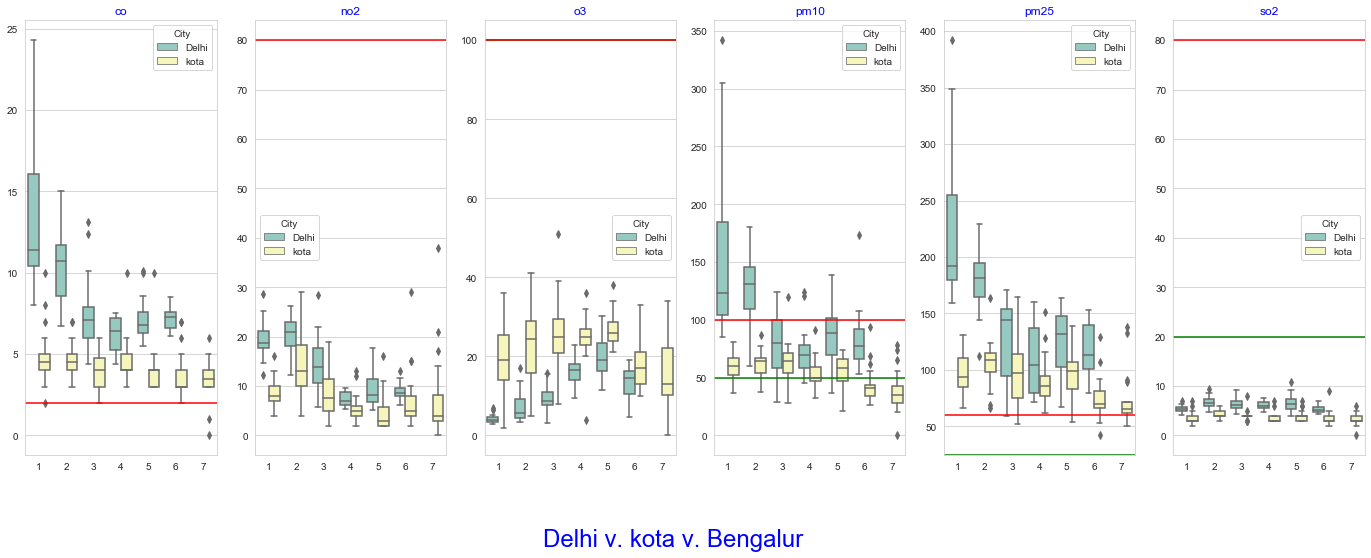

In [27]:
# and a few more: add Mumbai to the mix:
fig, ax = plt.subplots(1, len(pollutants), figsize=(24, 8))
city_r = 'kota'
city_u = 'Delhi'
city_u2 = 'Bengalur'
df = combo[(combo.City == city_u) | (combo.City == city_r) | (combo.City == city_u2)]
for i, p in enumerate(pollutants):
    d = df[df.Specie == p]     
    a = ax[i]
    sns.set_style("whitegrid")
    bp = sns.boxplot(x=d.month_num, y=d.value, hue=d.City, palette='Set3', ax=a)
    a.set(xlabel='', ylabel='')
    #bp.legend_.remove()
    #d[d.City == city].boxplot(column='value', by='month_num', ax=a)
    a.set_title(p, color='blue')
    if pollutant_who[p]:
        a.axhline(y=pollutant_who[p], c='g')
    if pollutant_naaqs[p]:
        a.axhline(y=pollutant_naaqs[p], c='r')
plt.suptitle(f'{city_u} v. {city_r} v. {city_u2}', fontsize=24, color='b', y=-0.001)
#plt.savefig(f'images/boxplot-{city_u}-{city_r}-poll.png', bbox_inches='tight')
plt.show()